In [1]:
import pandas as pd

"""
Carregando as bases de vinho tindo e branco dos site archive.ics.uci.edu nos respectivos links
https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
"""
red_base = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
white_base = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

dfr = pd.read_csv(red_base,sep=';')

print(dfr.shape, "linhas, colunas")
print(dfr.info())
dfr.head(10)

(1599, 12) linhas, colunas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [2]:
dfr.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


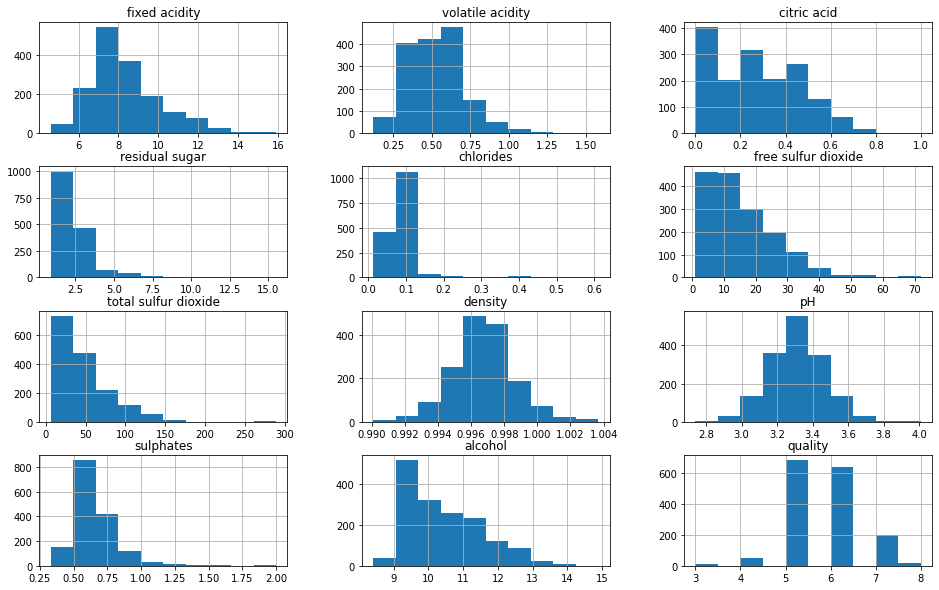

In [3]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [16,10]
# Histogramas
dfr.hist(bins=10)
plt.show()


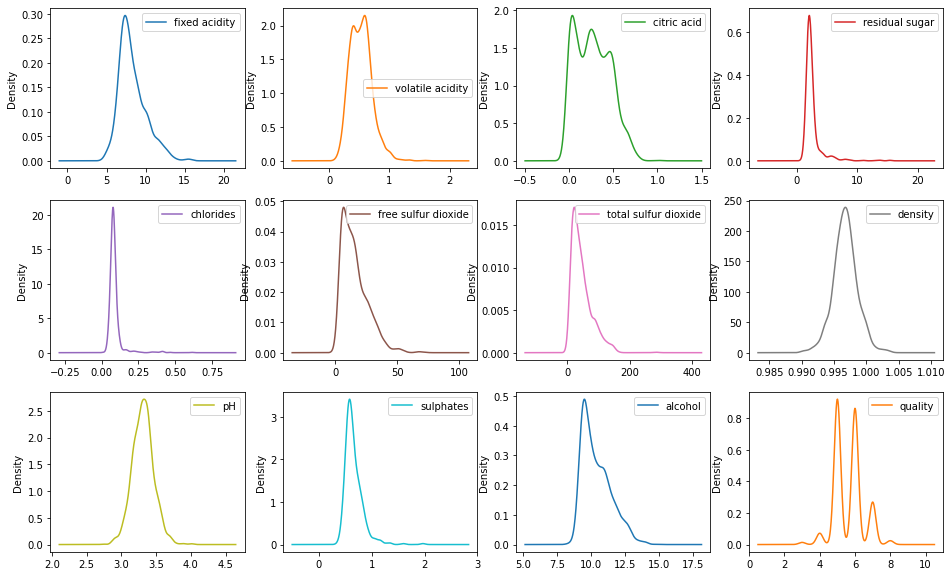

In [4]:
# Distribuição
dfr.plot(kind='density', subplots=True, layout=(3,4), sharex=False)
plt.show()

In [5]:
# Criando a tabela dinamica para determinar a correlação da qualidade x cada variável
_column_names = [
    'fixed acidity', 
    'volatile acidity', 
    'citric acid', 
    'residual sugar', 
    'chlorides',
    'free sulfur dioxide', 
    'total sulfur dioxide', 
    'density', 
    'pH', 
    'sulphates', 
    'alcohol'
]
dfr_din_table = dfr.pivot_table(_column_names, index=['quality'], aggfunc='median')
dfr_din_table

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,
3,9.925,0.0905,0.035,0.997565,7.50,6.0,3.39,2.1,0.545,15.0,0.845
4,10.000,0.0800,0.090,0.996500,7.50,11.0,3.37,2.1,0.560,26.0,0.670
5,9.700,0.0810,0.230,0.997000,7.80,15.0,3.30,2.2,0.580,47.0,0.580
6,10.500,0.0780,0.260,0.996560,7.90,14.0,3.32,2.2,0.640,35.0,0.490
7,11.500,0.0730,0.400,0.995770,8.80,11.0,3.28,2.3,0.740,27.0,0.370
8,12.150,0.0705,0.420,0.994940,8.25,7.5,3.23,2.1,0.740,21.5,0.370


In [6]:
# determinar a correlação de cada variável x a qualidade
corr_matrix = dfr.corr()
corr_matrix["quality"].sort_values(ascending=False)


quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

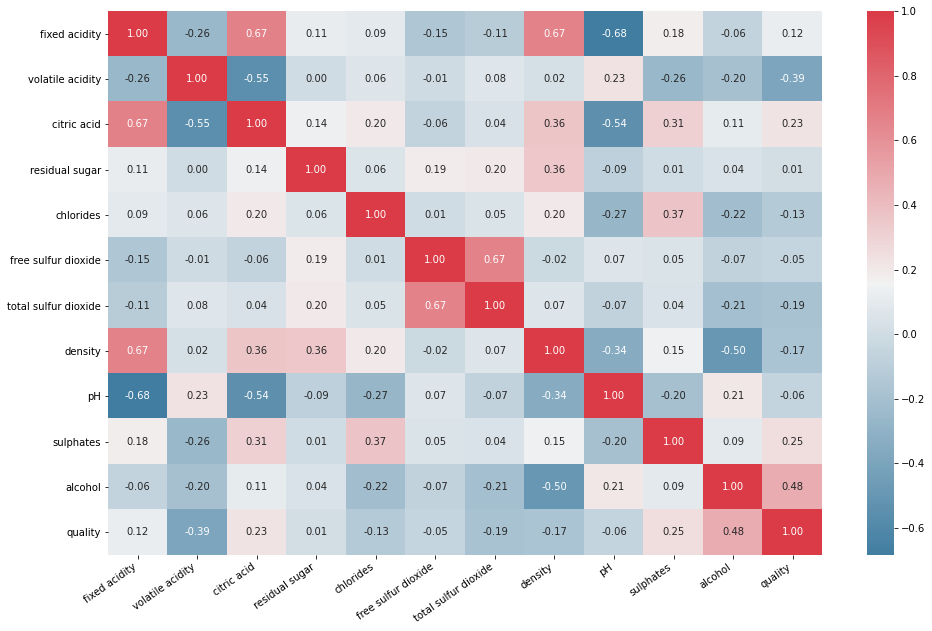

In [7]:
# para facilitar a visualização fiz uma matriz de correleção afim de perceber
# como duas variaveis so comportam em termos de magnitude
import seaborn as sns

correlations = dfr.corr()
fig, ax = plt.subplots()
# gerando um mapa de calor
colormap = sns.diverging_palette(235, 10, as_cmap=True)
# permitir anotações e ajuste de pontos flutuantes
sns.heatmap(correlations, cmap=colormap, annot=True, fmt=".2f")
#ajustando eixo x
column_names = [
    "fixed acidity", 
    "volatile acidity", 
    "citric acid", 
    "residual sugar", 
    "chlorides",
    "free sulfur dioxide", 
    "total sulfur dioxide", 
    "density", 
    "pH", 
    "sulphates", 
    "alcohol",
    "quality"
]
ax.set_xticklabels(column_names, rotation=35, horizontalalignment='right')
ax.set_yticklabels(column_names)
plt.show()

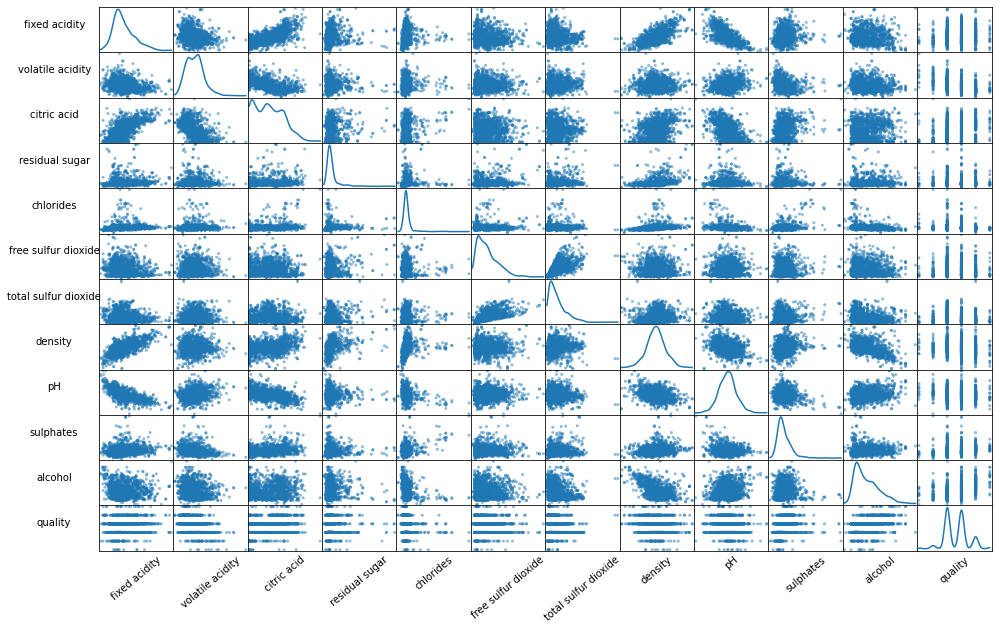

In [8]:
# matrix de dirtrbuição do dataset
from pandas.plotting import scatter_matrix
md = scatter_matrix(dfr,diagonal='kde')
# formatando o grafico
[s.xaxis.label.set_rotation(40) for s in md.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in md.reshape(-1)]
[s.get_yaxis().set_label_coords(-0.6,0.5) for s in md.reshape(-1)]
# escondendo as escalas
[s.set_xticks(()) for s in md.reshape(-1)]
[s.set_yticks(()) for s in md.reshape(-1)]

plt.show()

In [9]:
# Apartir desse quadro começa a preprocessamento dos dados

# separamos os vinho em "ruim", "medio" e "bom"
# sabendo que o maior valor de qualidade é 8 e o menor é 2
# dessa forma fazendo uma validação binária para a variavel resposta (qualidade)
from sklearn.preprocessing import LabelEncoder
valores = ['ruim', 'bom']
df = dfr
df['quality'] = pd.cut(dfr['quality'], bins=(2, 6, 9),labels=valores)
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,ruim
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,ruim
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,ruim
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,ruim
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,ruim
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,ruim
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,ruim
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,bom
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,bom
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,ruim


In [10]:
label_quality = LabelEncoder()
# ruim vira 0 bom vira 1
df['quality'] = label_quality.fit_transform(df['quality'])
df['quality'].value_counts()

1    1382
0     217
Name: quality, dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# separando a variavel resposta do data_set
X = dfr.drop('quality', axis=1)
y = dfr['quality']

#dividindo o data set em Treino e Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# aplicando a escala padrão para um melhor resultado
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)



SupportVectorClassifier: 0.873364 (0.024056)
StochasticGradientDecentC: 0.832739 (0.035855)
RandomForestClassifier: 0.891357 (0.026855)
AdaBoostClassifier: 0.866351 (0.039970)
KNeighborsClassifier: 0.860845 (0.026717)
DecisionTreeClassifier: 0.842840 (0.025100)
GaussianNB: 0.826446 (0.025753)
LogisticRegression: 0.871014 (0.028362)


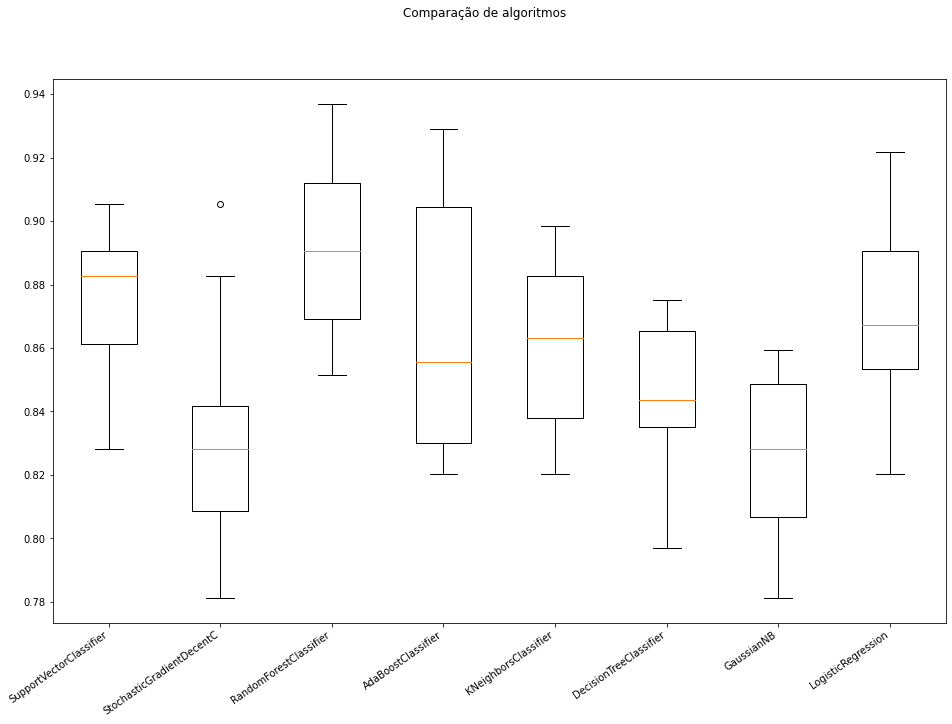

In [12]:
# apartir desse quadro começa os algoritmos de Machine Learning

# usei um pouco de progração dinamica afim de fazer uma validação
# cruzada entre os algoritmos e poder avaliar as predições e escolher o mais adequado
from warnings import simplefilter
# ignorando warnings 
from sklearn.exceptions import ConvergenceWarning
simplefilter(action='ignore', category=(FutureWarning, ConvergenceWarning))

from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection



models = []
models.append(('SupportVectorClassifier', SVC()))
models.append(('StochasticGradientDecentC', SGDClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('LogisticRegression', LogisticRegression()))

# avaliando cada model por vez
results = []
names = []
seed = 7
for name, model in models:
   kfold = model_selection.KFold(n_splits=10, random_state=seed)
   cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
   results.append(cv_results)
   names.append(name)
   print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

    
# visualizando o resultado
fig = plt.figure()
fig.suptitle('Comparação de algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_xticklabels(names, rotation=35, horizontalalignment='right')
plt.show()

In [13]:
# agora faz-se necessario um ajuste nos parâmetros para melhorar a precisão
# começo com o SupportVectorClassifier que teve uma média de precisão de 87,3 %
# com esse ajuste posso escolher o melhor método para treino e predizer a preferencia
from sklearn.model_selection import GridSearchCV

svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

# essa função executa e avalia os parametros possíveis
# para um modelo svc e retorna um dicionario de parametros com os melhores resultados 
def svc_param_selection(X, y, nfolds):
    param = {
        'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
        'kernel': ['linear', 'rbf'],
        'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]
    }
    grid_search = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=nfolds)
    grid_search.fit(X,  y)
    return grid_search.best_params_

best_params = svc_param_selection(X_train, y_train, 10)
print(best_params)

{'C': 1.4, 'gamma': 1.2, 'kernel': 'rbf'}


In [14]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

svc_opt = SVC(**best_params)
svc_opt.fit(X_train, y_train)
pred_svc_opt = svc_opt.predict(X_test)

print("Relatorio da classificação")
print(classification_report(y_test, pred_svc_opt))
print('Pontução', accuracy_score(y_test, pred_svc_opt))

Relatorio da classificação
              precision    recall  f1-score   support

           0       0.84      0.48      0.62        33
           1       0.94      0.99      0.97       287

    accuracy                           0.94       320
   macro avg       0.89      0.74      0.79       320
weighted avg       0.93      0.94      0.93       320

Pontução 0.9375


In [15]:
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=60)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

print("Relatorio da classificação")
print(classification_report(y_test, pred_sgd))
print('Pontução', accuracy_score(y_test, pred_sgd))

Relatorio da classificação
              precision    recall  f1-score   support

           0       0.43      0.79      0.55        33
           1       0.97      0.88      0.92       287

    accuracy                           0.87       320
   macro avg       0.70      0.83      0.74       320
weighted avg       0.92      0.87      0.88       320

Pontução 0.86875


In [16]:
random_forest = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=0)
random_forest.fit(X_train, y_train)
pred_random_forest = random_forest.predict(X_test)

print("Relatorio da classificação")
print(classification_report(y_test, pred_sgd))
print('Pontução', accuracy_score(y_test, pred_sgd))

Relatorio da classificação
              precision    recall  f1-score   support

           0       0.43      0.79      0.55        33
           1       0.97      0.88      0.92       287

    accuracy                           0.87       320
   macro avg       0.70      0.83      0.74       320
weighted avg       0.92      0.87      0.88       320

Pontução 0.86875


In [17]:
n_neighbors = 2

for weights in ['uniform', 'distance']:
    nbrs = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
    nbrs.fit(X_train,y_train)
    pred_nbrs = nbrs.predict(X_test)
    print('KNeighborsClassifier: ', weights)
    print("Relatorio da classificação")
    print(classification_report(y_test, pred_nbrs))
    print('Pontução', accuracy_score(y_test, pred_nbrs))

KNeighborsClassifier:  uniform
Relatorio da classificação
              precision    recall  f1-score   support

           0       0.42      0.82      0.55        33
           1       0.98      0.87      0.92       287

    accuracy                           0.86       320
   macro avg       0.70      0.84      0.73       320
weighted avg       0.92      0.86      0.88       320

Pontução 0.8625
KNeighborsClassifier:  distance
Relatorio da classificação
              precision    recall  f1-score   support

           0       0.51      0.70      0.59        33
           1       0.96      0.92      0.94       287

    accuracy                           0.90       320
   macro avg       0.74      0.81      0.77       320
weighted avg       0.92      0.90      0.91       320

Pontução 0.9


In [18]:
ada_class = AdaBoostClassifier(n_estimators=100)
ada_class.fit(X_train, y_train)
pred_ada = ada_class.predict(X_test)

print("Relatorio da classificação")
print(classification_report(y_test, pred_ada))
print('Pontução', accuracy_score(y_test, pred_ada))

Relatorio da classificação
              precision    recall  f1-score   support

           0       0.64      0.55      0.59        33
           1       0.95      0.97      0.96       287

    accuracy                           0.92       320
   macro avg       0.80      0.76      0.77       320
weighted avg       0.92      0.92      0.92       320

Pontução 0.921875


In [19]:
# função que avalia a performance dos modelos
# e imprime a média de erros absolutos e a precisão de cada um
from sklearn.metrics import mean_absolute_error
def evaluate(model, test_features, test_labels, model_name):
    predictions = model.predict(test_features)
    print("Performance para", model_name)
    print("Media absoluta de erro: {:0.4f} ".format(mean_absolute_error(test_labels,predictions)))
    print("Precisão: {:0.2f}%.".format(accuracy_score(test_labels,predictions)*100))

In [20]:
evaluate(svc,X_test,y_test, "svc 'default'")
evaluate(svc_opt,X_test,y_test, "svc otimizado")
evaluate(sgd,X_test,y_test, "sgd")
evaluate(random_forest, X_test,y_test, "random forest")
evaluate(ada_class,X_test,y_test, "ada")

Performance para svc 'default'
Media absoluta de erro: 0.0781 
Precisão: 92.19%.
Performance para svc otimizado
Media absoluta de erro: 0.0625 
Precisão: 93.75%.
Performance para sgd
Media absoluta de erro: 0.1313 
Precisão: 86.88%.
Performance para random forest
Media absoluta de erro: 0.0625 
Precisão: 93.75%.
Performance para ada
Media absoluta de erro: 0.0781 
Precisão: 92.19%.


In [21]:
from  sklearn.model_selection import cross_val_score

algos = [
    ("svc", svc),
    ("svc otimizado", svc_opt),
    ("SGD", sgd),
    ("random forest", random_forest), 
    ("ada class", ada_class)
]

for name, algo in algos:
    scores = cross_val_score(algo, X_test, y_test, cv=5)
    print(f"media de pontuação {name}", scores.mean())

media de pontuação svc 0.9
media de pontuação svc otimizado 0.91875
media de pontuação SGD 0.88125
media de pontuação random forest 0.91875
media de pontuação ada class 0.896875


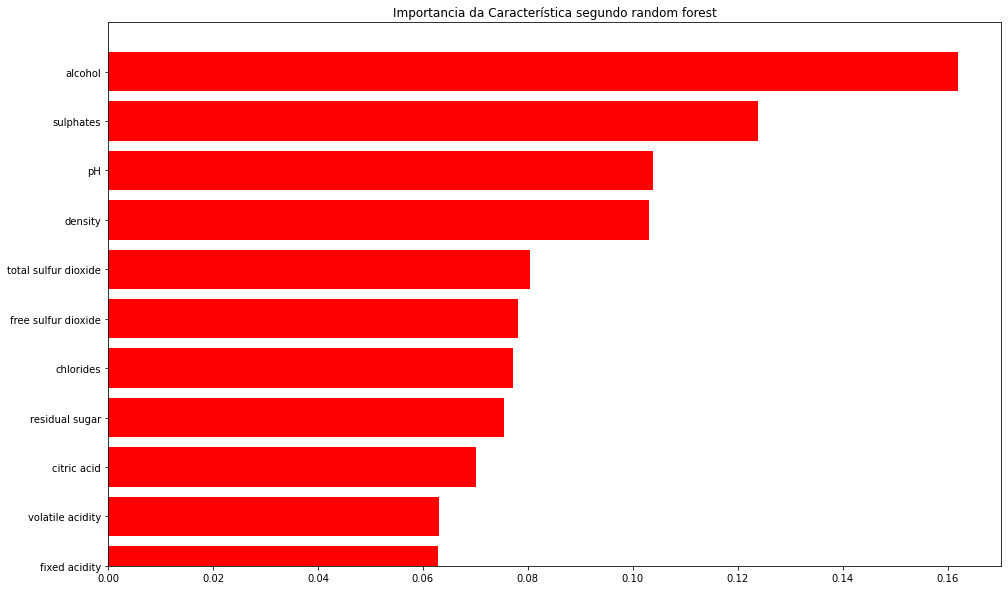

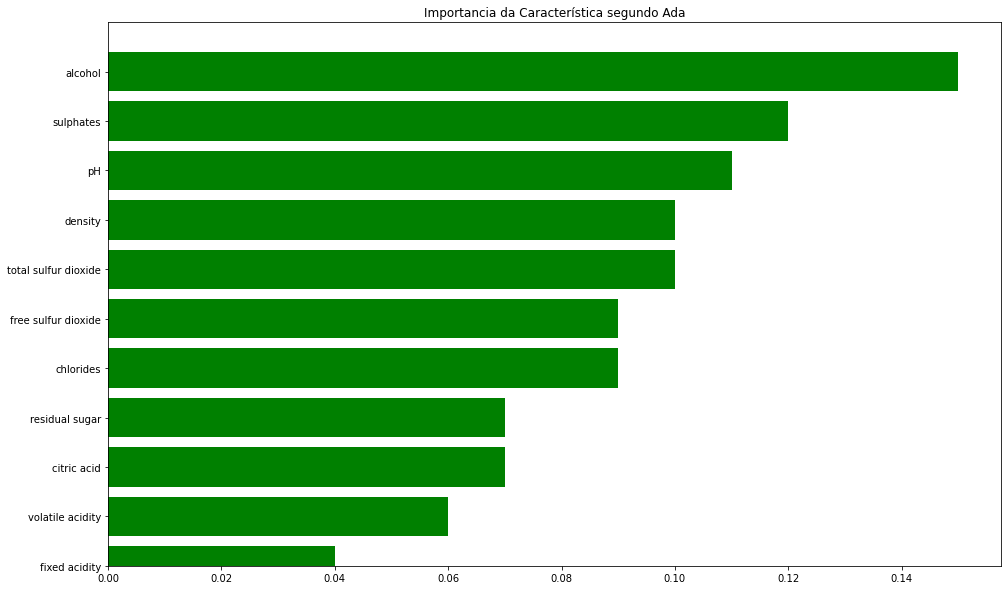

In [23]:
import numpy as np

algos = [("random forest", random_forest, "r"), ("Ada", ada_class, "g")]

for name, algo, color in algos:
    importance=algo.feature_importances_
    index = np.argsort(importance)
    # grafico da relevância de cada variavel na resposta
    plt.figure()
    plt.title(f"Importancia da Característica segundo {name}")
    plt.barh(range(X.shape[1]), importance[index], color=color, align="center")
    plt.yticks(range(X.shape[1]), _column_names)
    plt.ylim([0, X.shape[1]])
    plt.show()
